# Import Library and Dataset

In [2]:
import matplotlib.pyplot as plt
import matplotlib as pt
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
url = 'Dataset/Spotify-2000.csv'
df = pd.read_csv(url)
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


# DATA MUNGING 

In [4]:
df.info

<bound method DataFrame.info of       Index                   Title                    Artist  \
0         1                 Sunrise               Norah Jones   
1         2             Black Night               Deep Purple   
2         3          Clint Eastwood                  Gorillaz   
3         4           The Pretender              Foo Fighters   
4         5  Waitin' On A Sunny Day         Bruce Springsteen   
...     ...                     ...                       ...   
1989   1990        Heartbreak Hotel             Elvis Presley   
1990   1991               Hound Dog             Elvis Presley   
1991   1992         Johnny B. Goode               Chuck Berry   
1992   1993               Take Five  The Dave Brubeck Quartet   
1993   1994          Blueberry Hill               Fats Domino   

                Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
0         adult standards  2004                     157      30            53   
1              album rock

In [5]:
df.rename(columns = {'Top Genre':'top_genre'}, inplace = True)

In [6]:
df.top_genre.value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: top_genre, Length: 149, dtype: int64

In [7]:
df.head()

,Index,Title,Artist,top_genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [8]:
df.tail()

,Index,Title,Artist,top_genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65
1993,1994,Blueberry Hill,Fats Domino,adult standards,1959,133,50,49,-10,16,83,148,74,3,56


In [9]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [10]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
top_genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [11]:
df.isnull().values.any()

False

In [12]:
df2 = df.dropna()

In [13]:
print(df2.dtypes)
print(df.dtypes)

Index                      int64
Title                     object
Artist                    object
top_genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object
Index                      int64
Title                     object
Artist                    object
top_genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 in

In [14]:
df2.isnull().values.any()

False

C:\Users\Harris\AppData\Local\Temp\ipykernel_11716\1386861542.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


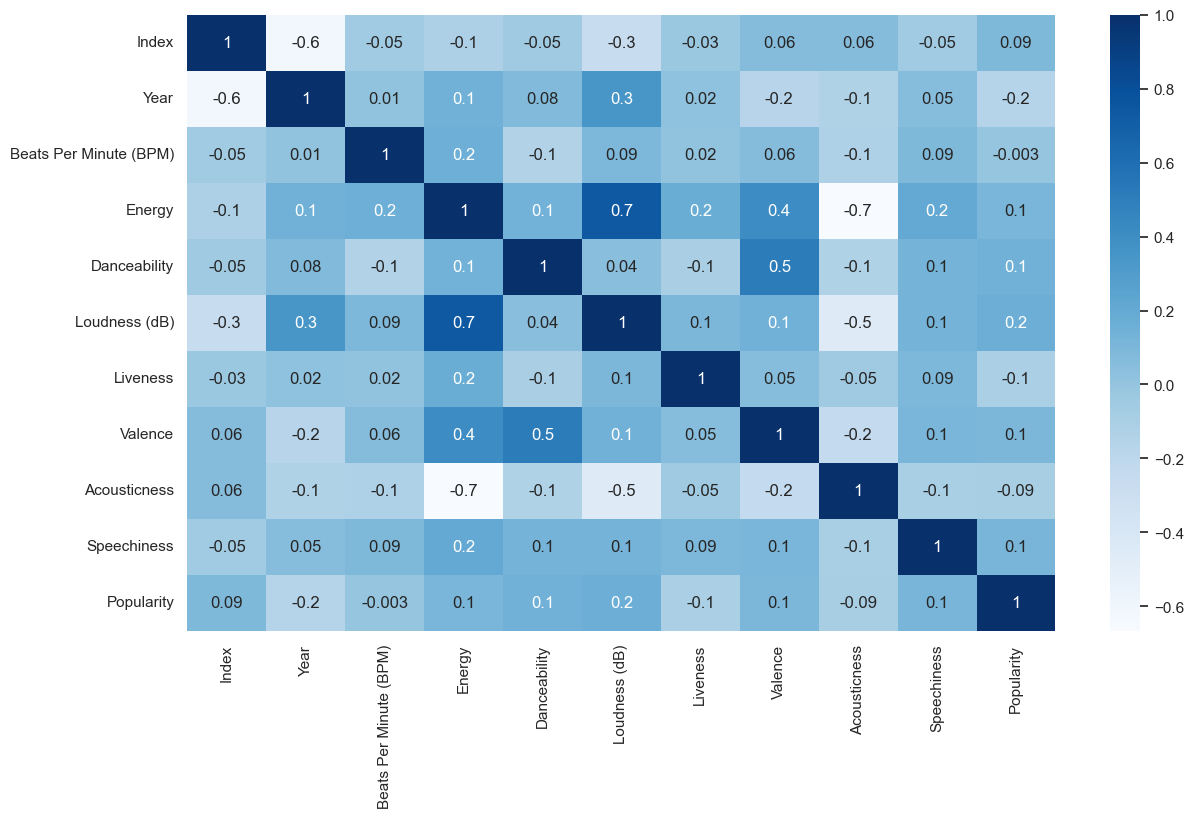

In [33]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


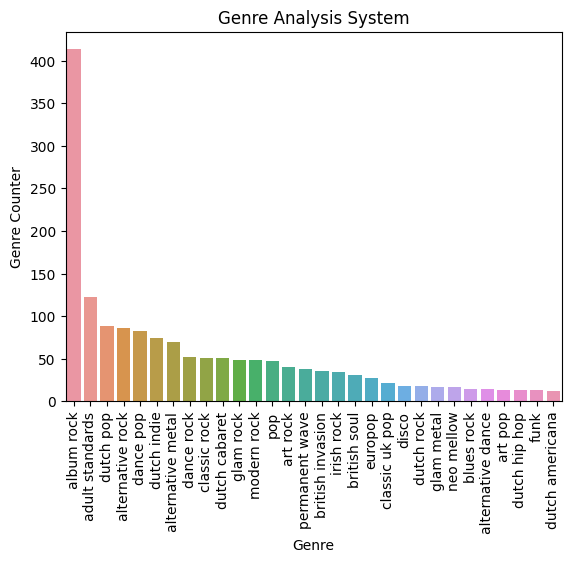

In [16]:
# Print variance age data from dataset
sns.barplot(x=df2.top_genre.value_counts()[:30].index,y=df.top_genre.value_counts()[:30].values)
plt.xlabel('Genre')
plt.ylabel('Genre Counter')
plt.title('Genre Analysis System')
plt.rcParams["figure.figsize"] = (15, 20)
plt.rcParams["xtick.labelsize"] = 8
plt.xticks(rotation=90)
plt.show()

In [17]:
# #add new column 'GenreRange' into dataset and normalize the data
# df2['Genre_Range']=0
# year1_index=df2[(df2.year<=2015)].index 
# year2_index=df2[(df2.year>=2016) & (df2.year<=2018)].index
# year3_index=df2[(df2.year>2018)].index
# for index in year3_index:
#     df2.loc[index,'Genre_Range']=2
    
# for index in year2_index:
#     df2.loc[index,'Genre_Range']=1

# for index in year1_index:
#     df2.loc[index,'Genre_Range']=0

# # Draw a categorical scatterplot to show each observation
# sns.swarmplot(x="Genre_Range", y="year",hue='top_genre',
#                palette=["red", "cyan", "red","red","cyan","red","cyan","red","red","red","red","red","red","cyan","cyan",
#                         "red","red","red","red","red","red","cyan","red","cyan","cyan","red","cyan","cyan","red","red","red",
#                         "red","red","cyan"], data=df2)
# plt.show()

# GROUPING THE GENRE

In [18]:
values = ['canadian contemporary r&b','latin', 'electro house','australian dance','beatlesque','neo soul','brostep','irish singer-songwriter']
df2 = df2[df2.top_genre.isin(values) == False]
# Change genre into numeric value
df2['genre_class'] = 0
#Maingroup
#Pop Class
df2.loc[df2.top_genre == 'dance pop','genre_class'] = 0
df2.loc[df2.top_genre == 'pop','genre_class'] = 0
df2.loc[df2.top_genre == 'canadian pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'electropop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'folk-pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'danish pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'acoustic pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'australian pop', 'genre_class'] = 0
df2.loc[df2.top_genre == 'pop dance','genre_class'] = 0
df2.loc[df2.top_genre == 'boy band', 'genre_class'] = 0
#Rap Class
df2.loc[df2.top_genre == 'dfw rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'melodic rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'emo rap','genre_class'] = 1
df2.loc[df2.top_genre == 'rap','genre_class'] = 1
df2.loc[df2.top_genre == 'cali rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'gangster rap','genre_class'] = 1
df2.loc[df2.top_genre == 'chicago rap', 'genre_class'] = 1
df2.loc[df2.top_genre == 'pop rap', 'genre_class'] = 1
#Rock Class
df2.loc[df2.top_genre == 'modern rock', 'genre_class'] = 2
df2.loc[df2.top_genre == 'alternative rock', 'genre_class'] = 2
#Hip Hop Class
df2.loc[df2.top_genre == 'canadian hip hop', 'genre_class'] = 3 
df2.loc[df2.top_genre == 'north carolina hip hop', 'genre_class'] = 3
df2.loc[df2.top_genre == 'detroit hip hop', 'genre_class'] = 3
df2.loc[df2.top_genre == 'lgbtq+ hip hop','genre_class'] = 3
df2.loc[df2.top_genre == 'conscious hip hop', 'genre_class'] = 3



#Group for all genre
# df2.loc[df2.top_genre == 'dance pop','genre_class'] = 0
# df2.loc[df2.top_genre == 'pop','genre_class'] = 1
# df2.loc[df2.top_genre == 'dfw rap', 'genre_class'] = 2
# df2.loc[df2.top_genre == 'modern rock', 'genre_class'] = 3
# df2.loc[df2.top_genre == 'canadian pop', 'genre_class'] = 4
# df2.loc[df2.top_genre == 'canadian contemporary r&b', 'genre_class'] = 5
# df2.loc[df2.top_genre == 'electropop', 'genre_class'] = 6
# df2.loc[df2.top_genre == 'melodic rap', 'genre_class'] = 7
# df2.loc[df2.top_genre == 'latin', 'genre_class'] = 8
# df2.loc[df2.top_genre == 'folk-pop', 'genre_class'] = 9
# df2.loc[df2.top_genre == 'canadian hip hop', 'genre_class'] = 10
# df2.loc[df2.top_genre == 'emo rap','genre_class'] = 11
# df2.loc[df2.top_genre == 'rap','genre_class'] = 12
# df2.loc[df2.top_genre == 'north carolina hip hop', 'genre_class'] = 13
# df2.loc[df2.top_genre == 'boy band', 'genre_class'] = 14
# df2.loc[df2.top_genre == 'detroit hip hop', 'genre_class'] = 15
# df2.loc[df2.top_genre == 'electro house', 'genre_class'] = 16
# df2.loc[df2.top_genre == 'australian dance', 'genre_class'] = 17
# df2.loc[df2.top_genre == 'beatlesque', 'genre_class'] = 18
# df2.loc[df2.top_genre == 'cali rap', 'genre_class'] = 19
# df2.loc[df2.top_genre == 'danish pop', 'genre_class'] = 20
# df2.loc[df2.top_genre == 'acoustic pop', 'genre_class'] = 21
# df2.loc[df2.top_genre == 'lgbtq+ hip hop','genre_class'] = 22
# df2.loc[df2.top_genre == 'gangster rap','genre_class'] = 23
# df2.loc[df2.top_genre == 'chicago rap', 'genre_class'] = 24
# df2.loc[df2.top_genre == 'australian pop', 'genre_class'] = 25
# df2.loc[df2.top_genre == 'alternative rock', 'genre_class'] = 26
# df2.loc[df2.top_genre == 'conscious hip hop', 'genre_class'] = 27
# df2.loc[df2.top_genre == 'classic rock', 'genre_class'] = 28
# df2.loc[df2.top_genre == 'neo soul', 'genre_class'] = 29
# df2.loc[df2.top_genre == 'pop rap', 'genre_class'] = 30
# df2.loc[df2.top_genre == 'brostep', 'genre_class'] = 31
# df2.loc[df2.top_genre == 'irish singer-songwriter', 'genre_class'] = 32
# df2.loc[df2.top_genre == 'pop dance','genre_class'] = 33


df2.drop(labels=['top_genre'], axis=1)

,Index,Title,Artist,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,genre_class
0,1,Sunrise,Norah Jones,2004,157,30,53,-14,11,68,201,94,3,71,0
1,2,Black Night,Deep Purple,2000,135,79,50,-11,17,81,207,17,7,39,0
2,3,Clint Eastwood,Gorillaz,2001,168,69,66,-9,7,52,341,2,17,69,0
3,4,The Pretender,Foo Fighters,2007,173,96,43,-4,3,37,269,0,4,76,0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,2002,106,82,58,-5,10,87,256,1,3,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,1958,94,21,70,-12,11,72,128,84,7,63,0
1990,1991,Hound Dog,Elvis Presley,1958,175,76,36,-8,76,95,136,73,6,69,0
1991,1992,Johnny B. Goode,Chuck Berry,1959,168,80,53,-9,31,97,162,74,7,74,0
1992,1993,Take Five,The Dave Brubeck Quartet,1959,174,26,45,-13,7,60,324,54,4,65,0


C:\Users\Harris\AppData\Local\Temp\ipykernel_11716\1370696172.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


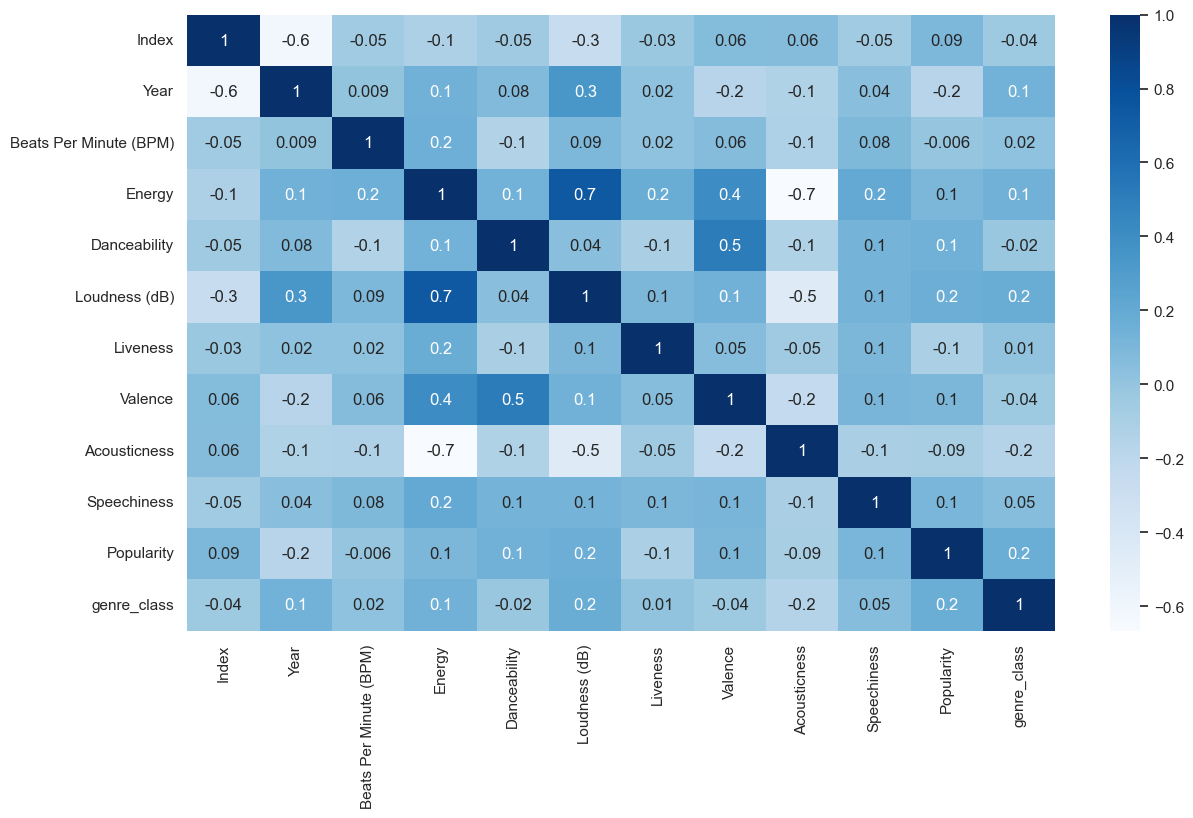

In [35]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df2.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


In [20]:
hehv = np.where((df2['genre_class']==0) & (df2['Energy']>=61) & (df2['Valence']>=50))

print(df2.loc[hehv])

      Index                                Title                 Artist  \
1         2                          Black Night            Deep Purple   
2         3                       Clint Eastwood               Gorillaz   
4         5               Waitin' On A Sunny Day      Bruce Springsteen   
6         7                    She Will Be Loved               Maroon 5   
12       13                        Als Het Golft                De Dijk   
...     ...                                  ...                    ...   
1974   1975                             Overture                The Who   
1975   1976                    Streets of London           Ralph McTell   
1978   1979  The First Time Ever I Saw Your Face          Roberta Flack   
1983   1984    Black Magic Woman - 2018 Remaster          Fleetwood Mac   
1984   1985   Suite: Judy Blue Eyes - Remastered  Crosby, Stills & Nash   

                top_genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
1              alb

In [22]:
# Resets te options
pd.reset_option('all')
display(df)

C:\Users\Harris\AppData\Local\Temp\ipykernel_11716\2419876557.py:2: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
C:\Users\Harris\AppData\Local\Temp\ipykernel_11716\2419876557.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
C:\Users\Harris\AppData\Local\Temp\ipykernel_11716\2419876557.py:2: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


,Index,Title,Artist,top_genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [ ]:
df2["Length (Duration)"] = df2["Length (Duration)"].str.replace(',','')
df2["Length (Duration)"] = df2["Length (Duration)"].astype(int)

In [ ]:
df2.info()

In [ ]:
df2.genre_class.value_counts()

In [ ]:
df2.describe()

# SPLIT THE DATASET INTO TRAIN AND TEST SET

In [ ]:
#Splitting data
import sklearn
from sklearn.model_selection import train_test_split

# head of the data
print(df2.head())

x = df2.iloc[:,5:14]
y = df2.loc[:,'genre_class']

print(x.shape,y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)



# MODEL & TECHNIQUE AND EVALUATION 

**The models with using accuracy and confusion matrix as the evaluation method**

**1.Decision Tree**

In [ ]:
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_predict = dt.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict))

**2.SVM**

In [ ]:
# ended up not using

# from sklearn.svm import LinearSVC

# clf = LinearSVC().fit(x_train, y_train)
# print('spotify dataset')
# print('Accuracy of Linear SVC classifier on training set: {:.2f}'
#      .format(clf.score(x_train, y_train)))
# print('Accuracy of Linear SVC classifier on test set: {:.2f}'
#      .format(clf.score(x_test, y_test)))

In [ ]:
svm_linear=SVC(kernel='linear', C=1,gamma=1,probability=True).fit(x_train, y_train)
svm_linear.score(x_test,y_test)

In [ ]:
# svm_poly=SVC(kernel='poly', C=1,gamma=1,probability=True).fit(x_train, y_train)
# svm_poly.score(x_test,y_test)

In [ ]:
svm_sigmoid=SVC(kernel='sigmoid', C=2,gamma=3,probability=True).fit(x_train, y_train)
svm_sigmoid.score(x_test,y_test)

**3.KNN**

In [ ]:
pip install mlxtend

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

knn = KNeighborsClassifier(n_neighbors=54)
knn.fit(x_train,y_train)
knn.predict(x_test)
accuracy_score = knn.score(x_test,y_test) 
print("Accuracy score of test is ""{:.3f}".format(accuracy_score))







In [ ]:
np.array(y_test)

In [ ]:
# #Predict the response for test dataset
# y_pred = svm_poly.predict(x_test)
# y_pred

In [ ]:
y_pred = svm_linear.predict(x_test)
y_pred

In [ ]:
y_pred = svm_sigmoid.predict(x_test)
y_pred

In [ ]:
y_pred = dt.predict(x_test)
y_pred

In [ ]:
y_pred = knn.predict(x_test)
y_pred

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_log_error(y_test, y_pred))

plt.figure(figsize=(10,10))
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
df2.corr()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
 
# plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Predict data

**Predict the genre from dataset**

In [ ]:
df2.loc[[3]]

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
res = dt.predict(x_test.loc[[3]])
res

In [ ]:
res = svm_linear.predict(x_test.loc[[3]])
res

In [ ]:
res = svm_sigmoid.predict(x_test.loc[[3]])
res

In [ ]:
# res = svm_poly.predict(x_test.loc[[3]])
# res

In [ ]:
res = knn.predict(x_test.loc[[3]])
res

**Predict genre from dummy data**

In [ ]:
column_names = x_test.columns.values.tolist()

In [ ]:
column_names

In [ ]:
data = {
 'beats.per.minute' :[100],
 'energy' :[85],
 'danceability' :[75],
 'loudness.dB' :[-4],
 'liveness' :[9],
 'valance' :[70],
 'length' :[207],
 'acousticness' :[7],
 'speechiness' :[18],
 'popularity' :[86],

}

In [ ]:
df_test = pd.DataFrame(data)

In [ ]:
df_test

In [ ]:
res = dt.predict(df_test)
res

In [ ]:
res = svm_linear.predict(df_test)
res

In [ ]:
res = svm_sigmoid.predict(df_test)
res

In [ ]:
res = svm_poly.predict(df_test)
res

In [ ]:
res = knn.predict(df_test)
res

In [ ]:
data = {
 'beats.per.minute' :[114],
 'energy' :[62],
 'danceability' :[68],
 'loudness.dB' :[-6],
 'liveness' :[17],
 'valance' :[50],
 'length' :[212],
 'acousticness' :[25],
 'speechiness' :[10],
 'popularity' :[80]
}
df_test = pd.DataFrame(data)
df_test

In [ ]:
res = dt.predict(df_test)
res

In [ ]:
res0 = svm_linear.predict(df_test)
res0

In [ ]:
res1 = svm_sigmoid.predict(df_test)
res1

In [ ]:
res2 = svm_poly.predict(df_test)
res2

In [ ]:
res3 = knn.predict(df_test)
res3

In [ ]:
hehv = np.where((df2['energy']>=61) & (df2['valance']>=50))